# DAISY

In [144]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Завантажимо зображення

In [145]:
books = cv2.imread('./books.jpeg', cv2.IMREAD_GRAYSCALE)
book = cv2.imread('./book.jpeg', cv2.IMREAD_GRAYSCALE)

In [146]:
def show_img(img):
  converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(converted)

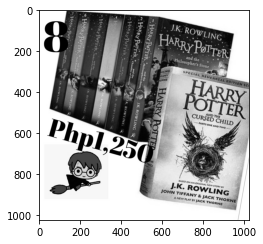

In [147]:
show_img(books)

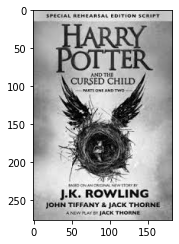

In [148]:
show_img(book)

## Створимо функцію для отримання ключових точок зображення

In [149]:
def daisy_kp(img):
    detector = cv2.FastFeatureDetector_create()
    daisy = cv2.xfeatures2d.DAISY_create()

    kps = detector.detect(img)

    return daisy.compute(img, kps)


In [150]:
kp1, desc1 = daisy_kp(book)
kp2, desc2 = daisy_kp(books)

## Використаєм вбудований в openCV Brut-Force Matcher

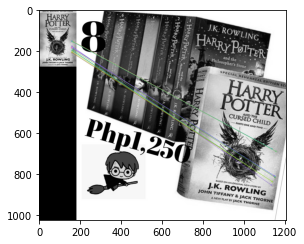

In [151]:
def custom_brut_force(img1, img2, kps1, des1, kps2, des2):
    bf = cv2.BFMatcher(cv2.NORM_L1)
    matches = bf.match(des1,des2)

    best_matches = sorted(matches, key=lambda x:x.distance)
    result = cv2.drawMatches(img1, kps1, img2, kps2, best_matches[:15], None, flags=2)

    return result

res1 = custom_brut_force(book, books, kp1, desc1, kp2, desc2)
show_img(res1)

## Використаєм власний Brut-Force Matcher

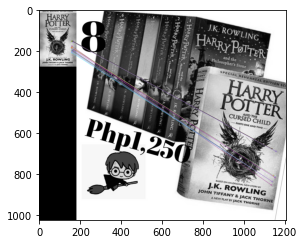

In [152]:
def custom_brut_force(img1, img2, kps1, des1, kps2, des2):
    matches = []

    for i, k1 in enumerate(des1):
        min_distance = 100000
        index = 0

        for j, k2 in enumerate(des2):
            distance = np.sum(np.abs(k1 - k2))

            if distance < min_distance:
              min_distance = distance
              index = j

        matches.append(cv2.DMatch(_distance=min_distance, _imgIdx=0, _queryIdx=i, _trainIdx=index))

    best_matches = sorted(matches, key=lambda x:x.distance)

    output_image = cv2.drawMatches(img1, kps1, img2, kps2, best_matches[:15], None, flags=2)

    return output_image

res2 = custom_brut_force(book, books, kp1, desc1, kp2, desc2)
show_img(res2)
